<a href="https://colab.research.google.com/github/amanzlast/10Academyweek1/blob/main/sentiment_anslysis_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [4]:
df_raw_ratings=pd.read_csv("/content/raw_analyst_ratings.csv")

In [8]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
sia=SentimentIntensityAnalyzer()

In [9]:
# Run the poalarity score on the entire dataset
res={}

for i,row in tqdm(df_raw_ratings.iterrows()):
    text=row['headline']
    myid=i
    res[myid]=sia.polarity_scores(text)




df_res=pd.DataFrame(res).T
df_res.head()

0it [00:00, ?it/s]

,neg,neu,pos,compound
0,0.0,1.000,0.000,0.000
1,0.0,1.000,0.000,0.000
2,0.0,1.000,0.000,0.000
3,0.0,1.000,0.000,0.000
4,0.0,0.833,0.167,0.296


In [10]:
# vaders =pd.DataFrame(res).T
merged_df = pd.merge(df_raw_ratings, df_res, left_index=True, right_index=True)
merged_df.head()

,Unnamed: 0,headline,url,publisher,date,stock,neg,neu,pos,compound
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A,0.0,1.000,0.000,0.000
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A,0.0,1.000,0.000,0.000
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A,0.0,1.000,0.000,0.000
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A,0.0,1.000,0.000,0.000
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A,0.0,0.833,0.167,0.296


In [11]:
merged_df['category'] = np.where(merged_df['compound'] < -0.1, 'negative',
                          np.where(merged_df['compound'] < 0.1, 'neutral', 'positive'))
value_counts=merged_df['category'].value_counts()
value_counts

,count
category,
neutral,5044
positive,2539
negative,1503


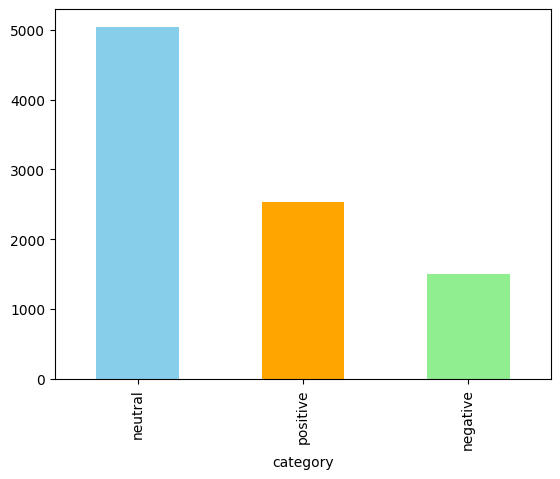

In [12]:
value_counts.plot(kind='bar', color=['skyblue', 'orange', 'lightgreen'])
plt.show()